use trained DeepIRES model, and then cluster sequences based on outputs from dense layers in DeepIRES' outputs

In [26]:
import numpy as np
import pandas as pd

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score,accuracy_score,recall_score,matthews_corrcoef,confusion_matrix,roc_curve, precision_recall_curve

import matplotlib.pyplot as plt

from model_copy import deepires_model, deepires_early_output

In [ ]:
# get the early output model version of deepires
model = deepires_early_output()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 174)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 174, 4)       20          ['input_2[0][0]']                
                                                                                                  
 conv1d_10 (Conv1D)             (None, 174, 16)      144         ['embedding_1[0][0]']            
                                                                                                  
 conv1d_11 (Conv1D)             (None, 174, 16)      208         ['embedding_1[0][0]']            
                                                                                            

In [7]:
model.load_weights("../weights/first").expect_partial()

In [ ]:
# get training data to cluster
train = np.load('../dataset/external_testing_dataset/Human5UTR_ires_full.npz')
X_train,y_train = train['X'], train['y']
print(X_train.shape)
print(y_train.shape)


(55000, 174)
(55000,)


In [24]:
print(y_train[:10])

[0 0 0 0 0 0 0 0 0 0]


In [16]:
hidden_output = model.predict(X_train)
print(hidden_output.shape)

1719/1719 [==============================] - 21s 12ms/step
(55000, 32)


In [18]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(hidden_output)
print(X_embedded.shape)

(55000, 2)


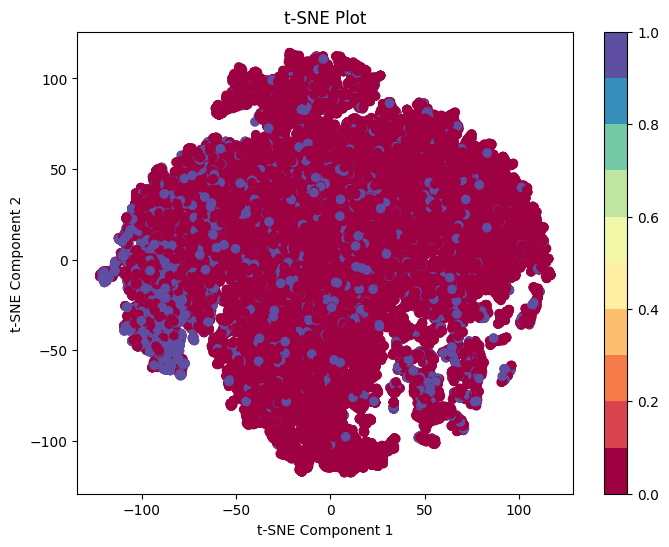

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_train, cmap=plt.cm.get_cmap("Spectral", 10))
plt.colorbar()
plt.title('t-SNE Plot')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

(55000, 2)


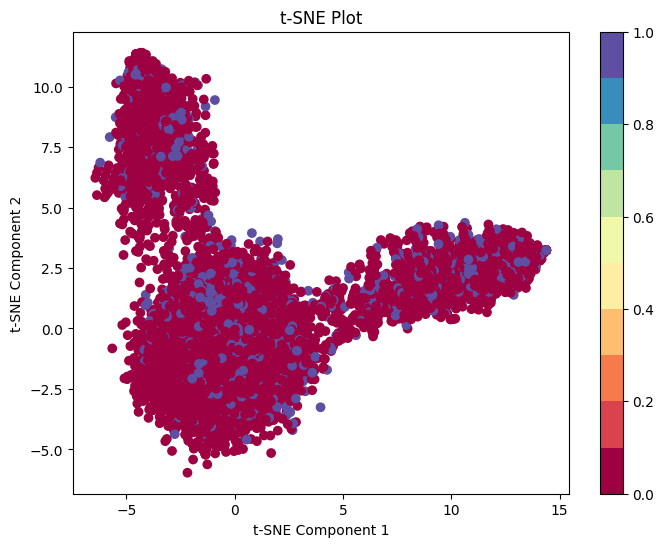

In [28]:
X_embedded = PCA(n_components=2).fit_transform(X_train)
print(X_embedded.shape)
plt.figure(figsize=(8, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_train, cmap=plt.cm.get_cmap("Spectral", 10))
plt.colorbar()
plt.title('t-SNE Plot')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()